In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [10]:
insurance_df = pd.read_csv("C:/Users/eddie/OneDrive/Desktop/Machine learning/insurance.csv")

In [9]:
#understanding the data

In [11]:
insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [12]:
insurance_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [13]:
insurance_df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [14]:
insurance_df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [15]:
pd.options.display.max_rows = None
pd.options.display.max_columns = None
insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.924000
1,18,male,33.770,1,no,southeast,1725.552300
2,28,male,33.000,3,no,southeast,4449.462000
3,33,male,22.705,0,no,northwest,21984.470610
4,32,male,28.880,0,no,northwest,3866.855200
5,31,female,25.740,0,no,southeast,3756.621600
6,46,female,33.440,1,no,southeast,8240.589600
7,37,female,27.740,3,no,northwest,7281.505600
8,37,male,29.830,2,no,northeast,6406.410700
9,60,female,25.840,0,no,northwest,28923.136920


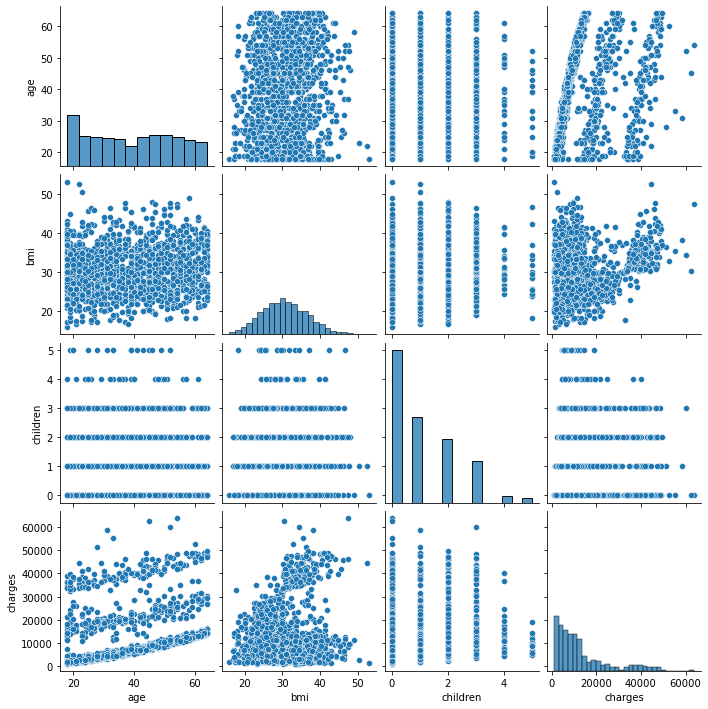

In [16]:
sns.pairplot(insurance_df)

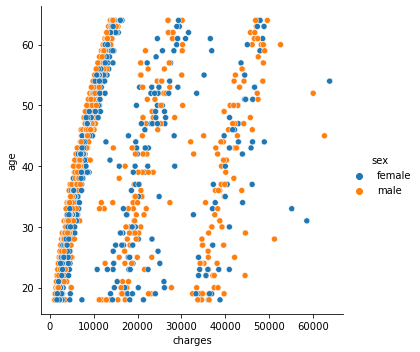

In [19]:
sns.relplot(x = "charges", y = "age", hue = "sex", data = insurance_df)

In [20]:
#MAE for the charges

In [23]:
x_true = [10000, 20000, 30000, 40000, 50000, 60000]
x_pred = [1137.011000, 6799.458000, 47055.532100,10959.694700, 11743.299000, 22331.566800 ]
mae = mean_absolute_error(x_true, x_pred)
print("MAE:", mae)

MAE: 24014.083766666667


In [24]:
#MSE for charges

In [38]:
x_true = [10000, 20000, 30000, 40000, 50000, 60000]
x_pred = [1137.011000, 6799.458000, 47055.532100,10959.694700, 11743.299000, 22331.566800 ]
x_true = np.array(x_true)
x_pred = np.array(x_pred)
squared_errors = (x_true - x_pred)**2
mse = np.mean(squared_errors)
print("MSE:", mse)

MSE: 711587236.8975812


In [40]:
#RMSE for the charges

In [41]:
x_true = [10000, 20000, 30000, 40000, 50000, 60000]
x_pred = [1137.011000, 6799.458000, 47055.532100,10959.694700, 11743.299000, 22331.566800 ]
x_true = np.array(x_true)
x_pred = np.array(x_pred)
squared_errors = (x_true - x_pred)**2
mean_squared_error = np.mean(squared_errors)
rmse = np.sqrt(mean_squared_error)
print("RMSE:", rmse)

RMSE: 26675.592531330607
